![](http://www.kiplinger.com/kipimages/pages/14024.jpg)

# An Extensive Medicare Data Exploration - Healthcare Analysis

## About Medicare 

In the United States, Medicare is a single-payer, national social insurance program administered by the U.S. federal government since 1966. United States Medicare is funded by a payroll tax, premiums and surtaxes from beneficiaries, and general revenue. It provides health insurance for Americans aged 65 and older who have worked and paid into the system through the payroll tax. It also provides health insurance to younger people with some disability status as determined by the Social Security Administration, as well as people with end stage renal disease and amyotrophic lateral sclerosis.

In 2015, Medicare provided health insurance for over **55 million** (46 million people age 65 and older and 9 million younger people). On average, Medicare covers about half of the health care charges for those enrolled. The enrollees must then cover their remaining costs either with supplemental insurance, separate insurance, or out-of-pocket. Out-of-pocket costs can vary depending on the amount of health care a Medicare enrollee needs. 

## About CMS

The Centers for Medicare & Medicaid Services (CMS), previously known as the Health Care Financing Administration (HCFA), is a federal agency within the United States Department of Health and Human Services (HHS) that administers the Medicare program and works in partnership with state governments to administer Medicaid, the Children's Health Insurance Program (CHIP), and health insurance portability standards. In addition to these programs, CMS has other responsibilities, including the administrative simplification standards from the Health Insurance Portability and Accountability Act of 1996 (HIPAA), quality standards in long-term care facilities (more commonly referred to as nursing homes) through its survey and certification process, clinical laboratory quality standards under the Clinical Laboratory Improvement Amendments, and oversight of HealthCare.gov.

## About the Data-Set

This [public dataset](https://www.kaggle.com/cms/cms-medicare) was created by the Centers for Medicare & Medicaid Services. The data summarizes the utilization and payments for procedures, services, and prescription drugs provided to Medicare beneficiaries by specific inpatient and outpatient hospitals, physicians, and other suppliers. The dataset includes the following data: Common inpatient and outpatient services, All physician and other supplier procedures and services, All Part D prescriptions. Providers determine what they will charge for items, services, and procedures provided to patients and these charges are the amount that providers bill for an item, service, or procedure.



## Contents

1. States having more nursing facilities  
2. HCC Scores - Which State and Which facilities have poor HCC scores  
&nbsp;&nbsp;&nbsp;&nbsp;  2.1 Max and Min HCC Scores for different States   
&nbsp;&nbsp;&nbsp;&nbsp;  2.2 Average HCC scores for different States  
&nbsp;&nbsp;&nbsp;&nbsp;  2.3 Facilities with High HCC scores  
&nbsp;&nbsp;&nbsp;&nbsp;  2.4 Facilities with Low HCC Scores
   

4. Which state has the largest number of stay days  
&nbsp;&nbsp;&nbsp;&nbsp;  4.1 States and their Average Total Stays (of different facilities) and Average length of stays    
  

5. Total Claims, Day Supply and Drug Costs  
&nbsp;&nbsp;&nbsp;&nbsp;  5.1 States having highest claims, supply, and cost      
&nbsp;&nbsp;&nbsp;&nbsp;  5.2 Drugs having highest claims, supply and cost      
&nbsp;&nbsp;&nbsp;&nbsp;  5.3 Nursing Specialities having highest claims, supply, and cost      




In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px

import plotly.graph_objects as go

## 1. Which State has the highest (and lowest) number of Nursing Facilities

Skilled nursing facilities (SNFs) and nursing facilities (NFs) are provided by CMS under medicare. Different States of US have differnt number of nursing facilities.  Number of nursing facilities in a state might be an indicator of how good is the quality of care in different states. Lets obtain the number if of nursing facilities using 2014 dataset

![](http://www.arh.org/Uploads/Images/Page/services-skillednursing%5B1%5D.jpg)

In [2]:
nursingFacilities=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/nursing_facilities_2014.csv')

In [3]:
nursingFacilities.head()

,Unnamed: 0,provider_id,facility_name,street_address,city,state,zip_code,total_stays,distinct_beneficiaries_per_provider,average_length_of_stays_days,...,percent_of_beneficiaries_with_copd,percent_of_beneficiaries_with_depression,percent_of_beneficiaries_with_diabetes,percent_of_beneficiaries_with_hyperlipidemia,percent_of_beneficiaries_with_hypertension,percent_of_beneficiaries_with_ihd,percent_of_beneficiaries_with_osteoporosis,percent_of_beneficiaries_with_ra_oa,percent_of_beneficiaries_with_schizophrenia,percent_of_beneficiaries_with_stroke
0,0,235618,HEARTLAND HEALTH CARE CENTER-CANTON,7025 LILLEY ROAD,CANTON,MI,48187,1104,829,25.1,...,40.0,51.0,47.0,70.0,NaN,68.0,20.0,69.0,10.0,17
1,1,495217,MANORCARE HEALTH SERVICES-FAIR OAKS,12475 LEE JACKSON MEMORIAL HIGHWAY,FAIRFAX,VA,22033,436,350,26.3,...,29.0,43.0,46.0,72.0,NaN,54.0,17.0,53.0,11.0,19
2,2,495121,CHERRYDALE HEALTH AND REHABILITATION CENTER,3710 LEE HIGHWAY,ARLINGTON,VA,22207,353,289,23.1,...,34.0,49.0,49.0,67.0,NaN,50.0,14.0,47.0,24.0,19
3,3,225554,COOLIDGE HOUSE,30 WEBSTER STREET,BROOKLINE,MA,2446,368,297,19.5,...,16.0,55.0,46.0,68.0,NaN,45.0,25.0,65.0,15.0,12
4,4,235663,NOTTING HILL OF WEST BLOOMFIELD,6535 DRAKE ROAD,W BLOOMFIELD,MI,48322,871,697,27.2,...,29.0,50.0,49.0,74.0,NaN,67.0,23.0,70.0,10.0,17


In [4]:
stateCounts=nursingFacilities.groupby('state').size().reset_index(name='counts')

In [5]:
stateCounts.head()

,state,counts
0,AK,7
1,AL,239
2,AR,234
3,AZ,138
4,CA,1084


In [6]:
geojson = px.data.election_geojson()

In [7]:
fig = px.choropleth(stateCounts, geojson=geojson, color='counts',
                    locations="state", locationmode = 'USA-states',
                    scope="usa",
                   )

fig.show()

**Inference**  
> Texas and California are the only states of US having more than 1000 Nursing Facilities   
> Purto Rico and Alaska are the states having exteremly low Nursing facilities with 5 and 7 respectively  
> About 40% of the total states have less than 200 nursing facilities 

## 2. Which State (and Nursing Facilities) have poor HCC risk adjustment scores 

The Center for Medicare & Medicaid Services (CMS) uses a Hierarchical Condition Category (HCC) risk adjustment model to calculate risk scores. The HCC model ranks diagnoses into categories that represent conditions with similar cost patterns. Higher categories represent higher predicted healthcare costs, resulting in higher risk scores. CMS uses HCCs to reimburse Medicare Advantage plans based on the health of their members. It pays accurately for the predicted cost expenditures of patients by adjusting those payments based on demographic information and patient health status. The risk assessment data used is based on the diagnosis information pulled from claims and medical records which are collected by physician offices, hospital inpatient visits and in outpatient settings.

CMS states that higher HCC scores means there is higher risk of chronic diseases while lower hcc indicates healthy population. It will be interesting to see what is the average hcc score for different states and facilities. 


### 2.1 Max and Min HCCs for different states

In [8]:
hccScoreByState=nursingFacilities[['state','average_hcc_score']].groupby('state').agg(['mean', 'min', 'max'])

In [9]:
hccScoreByState.reset_index(inplace=True)

In [10]:
hccScoreByState.head()

state average_hcc_score            
                     mean   min   max
0    AK          2.028571  1.77  2.32
1    AL          2.173682  1.24  3.98
2    AR          2.161410  1.17  3.65
3    AZ          2.415435  1.27  5.42
4    CA          2.612878  1.11  9.15

In [11]:
trace1 = go.Bar(
    x=hccScoreByState['state'],
    y=hccScoreByState['average_hcc_score']['max'],
    name='Max HCC Score',
    marker=dict(color='rgb(158,202,225)'),
)

trace2 = go.Bar(
    x=hccScoreByState['state'],
    y=hccScoreByState['average_hcc_score']['min'],
    name='Min HCC Score',
    marker=dict(color='rgb(58,22,25)'),
)


data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title='Minimum and Maximum HCC scores for different States',
    legend=dict(orientation="h")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

**Inference**  
> California's maximum HCC Score is high.
> Other States having high HCC scores are: Pennsylvania (7.84), Minnesotta (7.12), OHIO (7.07)  
> Hawaii and Montana are the states having low levels of HCC scores (0.75 and 0.79 respectively) 



**Let's focus on California** 

In [12]:
nursingFacilities[nursingFacilities['state']=='CA'][['provider_id','facility_name','city','state','average_length_of_stays_days','average_hcc_score']].sort_values('average_hcc_score',ascending=False).head(10)

,provider_id,facility_name,city,state,average_length_of_stays_days,average_hcc_score
4733,555649,DOCTORS HOSP OF WEST COVINA,WEST COVINA,CA,46.3,9.15
5016,55146,NORTH VALLEY NURSING CENTER,TUJUNGA,CA,27.1,6.76
82,56166,PARAMOUNT MEADOWS NURSING CTR.,PARAMOUNT,CA,24.8,6.15
544,56431,INLAND VALLEY CARE AND REHABILITATION CENTER,POMONA,CA,24.3,5.87
13119,56415,LYNWOOD HEALTHCARE CENTER,LYNWOOD,CA,24.5,5.56
535,56242,WESTLAKE CONVALESCENT HOSPITAL,LOS ANGELES,CA,26.2,5.53
3490,555814,SAN FERNANDO POST ACUTE HOSPITAL,SYLMAR,CA,28.2,5.46
5749,55708,LEGACY POST-ACUTE REHABILITATION,SAN BERNARDINO,CA,35.1,5.28
4788,555441,MEMORIAL HOSP OF GARDENA D P S,GARDENA,CA,50.1,5.21
4510,555255,EAST LOS ANGELES DOCTORS HOSP,LOS ANGELES,CA,35.0,5.14


### 2.2 Average HCC for different states

In [13]:
AverageHCCScoreByState=nursingFacilities[['state','average_hcc_score']].groupby('state').mean().reset_index()

In [14]:
AverageHCCScoreByState.head()

,state,average_hcc_score
0,AK,2.028571
1,AL,2.173682
2,AR,2.161410
3,AZ,2.415435
4,CA,2.612878


In [15]:
fig = px.choropleth(AverageHCCScoreByState, geojson=geojson, color='average_hcc_score',
                    locations="state", locationmode = 'USA-states',
                    scope="usa",
                   )

fig.show()

**Inference**  
> States having highest Average HCC scores are California (2.6), Texas(2.5), Florida(2.5), Minnesotta (2.5), Louisiana(2.5), and New Jersey (2.5)  
> States having lowest Average HCC scores are Montana (1.8), South Dakota (1.8), Wyoming (1.7), Puerto Rico (1.3)


### 2.3 Nursing Facilities with very HIGH HCC score

In [16]:
nursingFacilities[['facility_name','city','state','average_hcc_score']].sort_values(by='average_hcc_score',ascending=False).head(10)

,facility_name,city,state,average_hcc_score
4733,DOCTORS HOSP OF WEST COVINA,WEST COVINA,CA,9.15
11274,FOX SUBACUTE AT MECHANICSBURG,MECHANICSBURG,PA,7.84
5376,OMNI CONTINUING CARE,DETROIT,MI,7.12
14777,ORCHARDS OF RIDGEWOOD LIVING & REHAB CTR THE,AKRON,OH,7.07
726,MANORCARE HEALTH SYSTEM - ADELPHI,ADELPHI,MD,6.77
5016,NORTH VALLEY NURSING CENTER,TUJUNGA,CA,6.76
1998,PATAPSCO VALLEY CENTER,RANDALLSTOWN,MD,6.73
1954,SPRINGBROOK CENTER,SILVER SPRING,MD,6.72
6816,GLENSHIRE NURSING & REHAB CTRE,RICHTON PARK,IL,6.21
82,PARAMOUNT MEADOWS NURSING CTR.,PARAMOUNT,CA,6.15


### 2.4 Nursing Facilities with very LOW HCC score

In [17]:
nursingFacilities[['facility_name','city','state','average_hcc_score']].sort_values(by='average_hcc_score',ascending=True).head(10)

,facility_name,city,state,average_hcc_score
3249,KFH - MALAMA 'OHANA NURSING AND REHAB CENTER,HONOLULU,HI,0.75
9312,POWDER RIVER MANOR,BROADUS,MT,0.79
3630,ALDEN ESTATES OF SKOKIE,SKOKIE,IL,0.81
9815,ST ANTHONY SUMMIT MEDICAL CENTER,FRISCO,CO,0.84
9799,MERCER COUNTY JOINT TOWNSHIP COMMUNITY HOSPITAL,COLDWATER,OH,0.85
3257,ST PAUL RECOVERY INN,APPLETON,WI,0.86
9296,SAN LUIS VALLEY HEALTH,ALAMOSA,CO,0.86
4629,SENTARA OBICI SPECIALTY REHABILITATION CENTER,SUFFOLK,VA,0.87
9840,HILL TOP HOUSE,BUCKLIN,KS,0.93
10804,COLORADO PLAINS MEDICAL CENTER,FORT MORGAN,CO,0.95


## 4. Finding States / Facilities with poor average length of stay days 

### 4.1 States and their average total number stays (of different facilities) and average length of stays (in different facilities)

<Axes: xlabel='state', ylabel='average_length_of_stays_days'>

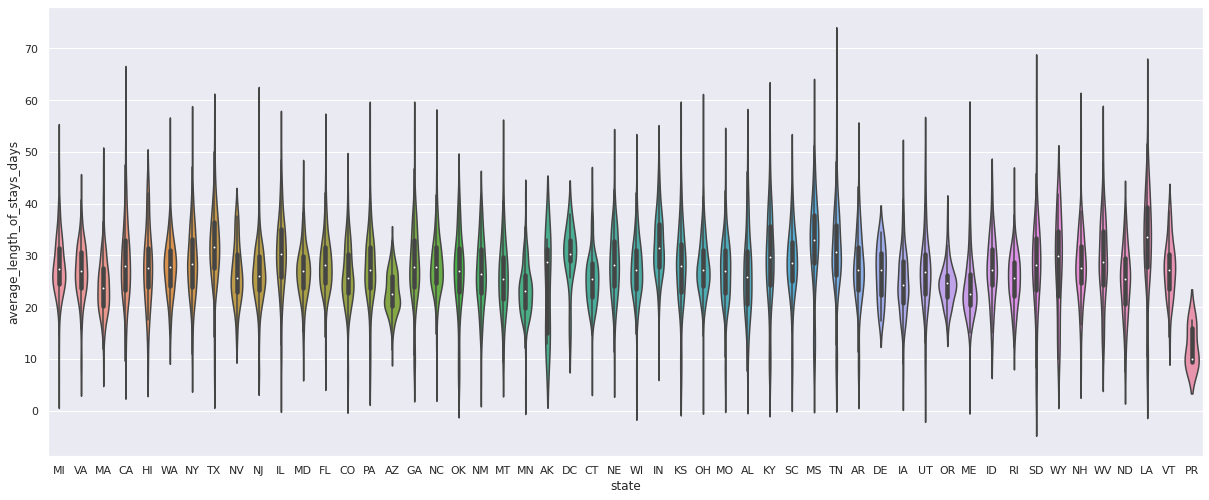

In [18]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.violinplot(data=nursingFacilities, x="state", y="average_length_of_stays_days")

**Inference**  
> - Average Length of Stay among patients in all states is very close to 30 days. (They also want to avoid 30-day readmission penalty)  
> - Arizona has a significantly lower average lenght of stay.
> - Louisiana, Texas, Illinois, Mississippi are the states having greater than 30 day average length of stay.  
> - Puerto Rico, a territory of US has the lowest average length of stay among all the states and territories (12).


## 5. Lets Explore the Total Claims, Day Supply and Drug Costs 

### 5.1 Which State has highest claims, Day Supply, and Drug Costs

In [19]:
TotalClaimsByState=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/TotalClaimsByState.csv')

In [20]:
TotalClaimsByState.head()

,Unnamed: 0,state,total_claim_count_millions,total_day_supply_millions,total_drug_cost_millions
0,0,CA,116.0,4935.0,9633.0
1,1,FL,91.0,3769.0,6970.0
2,2,NY,80.0,3150.0,7522.0
3,3,TX,76.0,3105.0,6462.0
4,4,PA,63.0,2402.0,4842.0


In [21]:
trace1 = go.Bar(
    x=TotalClaimsByState['state'],
    y=TotalClaimsByState['total_drug_cost_millions'],
    name='Total Drug Cost (Millions)',
    marker=dict(color='rgb(158,202,225)'),
)

trace2 = go.Bar(
    x=TotalClaimsByState['state'],
    y=TotalClaimsByState['total_day_supply_millions'],
    name='Total Day Supply (Millions)',
    marker=dict(color='rgb(58,22,25)'),
)


trace3 = go.Bar(
    x=TotalClaimsByState['state'],
    y=TotalClaimsByState['total_claim_count_millions'],
    name='Total Claim Count (Millions)',
    marker=dict(color='rgb(18,300,55)'),
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='stack',
    title='Total claim count VS Total Drug Cost VS Total Day Supply for every state',
    legend=dict(orientation="h")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

**Inference**  
> California is the state having highest total day supply, highest total drug cost and highest claim count.  
> Other states having more claim counts include Florida, Texas, and New York 



### 5.2 Which Drugs have been most prescribed in the US

In [22]:
TotalClaimsByDrugName=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/TotalClaimsByDrugName.csv')

In [23]:
TotalClaimsByDrugName.sort_values(by='total_day_supply_millions',ascending=False).head(20)

,Unnamed: 0,drug_name,total_claim_count_millions,total_day_supply_millions,total_drug_cost_millions
0,0,LEVOTHYROXINE SODIUM,42.0,2153.0,831.0
1,1,LISINOPRIL,38.0,1954.0,278.0
3,3,SIMVASTATIN,34.0,1844.0,343.0
2,2,AMLODIPINE BESYLATE,36.0,1774.0,302.0
5,5,ATORVASTATIN CALCIUM,32.0,1689.0,748.0
4,4,OMEPRAZOLE,32.0,1487.0,519.0
7,7,METFORMIN HCL,27.0,1355.0,326.0
8,8,FUROSEMIDE,26.0,1077.0,133.0
9,9,METOPROLOL TARTRATE,21.0,995.0,144.0
14,14,HYDROCHLOROTHIAZIDE,17.0,948.0,104.0


In [24]:
TotalClaimsByDrugNameTop50=TotalClaimsByDrugName.sort_values(by='total_day_supply_millions',ascending=False).head(50)

In [25]:
trace1 = go.Bar(
    x=TotalClaimsByDrugNameTop50['drug_name'],
    y=TotalClaimsByDrugNameTop50['total_drug_cost_millions'],
    name='Total Drug Cost (Millions)',
    marker=dict(color='rgb(158,202,225)'),
)

trace2 = go.Bar(
    x=TotalClaimsByDrugNameTop50['drug_name'],
    y=TotalClaimsByDrugNameTop50['total_day_supply_millions'],
    name='Total Day Supply (Millions)',
    marker=dict(color='rgb(58,22,25)'),
)


trace3 = go.Bar(
    x=TotalClaimsByDrugNameTop50['drug_name'],
    y=TotalClaimsByDrugNameTop50['total_claim_count_millions'],
    name='Total Claim Count (Millions)',
    marker=dict(color='rgb(18,300,55)'),
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='stack',
    title='Total claim count VS Total Drug Cost VS Total Day Supply per drug (Top 50)',
    legend=dict(orientation="v")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

**Inference**  

![](https://img.medscapestatic.com/pi/features/drugdirectory/octupdate/APP06470.jpg)

> - Levothyroxine Sodium and LISINOPRIL are the drugs which are associated with the highest number of claims  as well as highest number of supply  
> - Insulin Glargine, Hum.Rec.An is the drug which is associated with the highest Total Drug Cost  
> - Drugs having more Total Supply than Drug Costs are AMLODIPINE BESYLATE and SIMVASTATIN  
> - Drugs having more Total Cost than Supply are Rosuvastatin Calcium, and Esomeprazole magnesium


### 5.3 What about Nursing Specialities associated with highest claims

In [26]:
TotalClaimsBySpeciality=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/AnalyticsUtilizationManagement/main/data/TotalClaimsBySpeciality.csv')

In [27]:
TotalClaimsBySpecialityTop30=TotalClaimsBySpeciality.sort_values(by='total_drug_cost_millions',ascending=False).head(30)

In [28]:
TotalClaimsBySpecialityTop30

,Unnamed: 0,specialty_description,total_claim_count_millions,total_day_supply_millions,total_drug_cost_millions
0,0,Internal Medicine,386.0,16340.0,22983.0
1,1,Family Practice,361.0,14967.0,18254.0
2,2,Nurse Practitioner,78.0,2873.0,6402.0
8,8,Neurology,19.0,696.0,5087.0
4,4,Psychiatry,41.0,1307.0,4191.0
3,3,Cardiology,67.0,3401.0,4039.0
21,21,Hematology/Oncology,5.0,179.0,3467.0
16,16,Gastroenterology,10.0,357.0,3099.0
5,5,Physician Assistant,40.0,1493.0,3020.0
14,14,Rheumatology,11.0,440.0,2457.0


In [29]:
trace1 = go.Bar(
    x=TotalClaimsBySpecialityTop30['specialty_description'],
    y=TotalClaimsBySpecialityTop30['total_drug_cost_millions'],
    name='Total Drug Cost (Millions)',
    marker=dict(color='rgb(158,202,225)'),
)

trace2 = go.Bar(
    x=TotalClaimsBySpecialityTop30['specialty_description'],
    y=TotalClaimsBySpecialityTop30['total_day_supply_millions'],
    name='Total Day Supply (Millions)',
    marker=dict(color='rgb(58,22,25)'),
)


trace3 = go.Bar(
    x=TotalClaimsBySpecialityTop30['specialty_description'],
    y=TotalClaimsBySpecialityTop30['total_claim_count_millions'],
    name='Total Claim Count (Millions)',
    marker=dict(color='rgb(18,300,55)'),
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='stack',
    title='Total claim count VS Total Drug Cost VS Total Day Supply per speciality (Top 30)',
    legend=dict(orientation="v")
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

**Inference**
> Internal Medicine and Family Practice are associated with highest claims   
> These specialities also have highest total drug cost. Other Specialities with similar stats include Nurse Practitioner, Cardiology and General Practice